<a href="https://colab.research.google.com/github/Sourabh7k-Insights/Delhivery/blob/main/Delhivery_data_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Delhivery Case Study

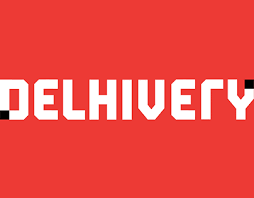

In [1]:
# @title Delhivery  {"display-mode":"code"}
from IPython.display import Image

# Display the uploaded image
Image(filename='/content/sample_data/delhivary_1.png',width=1300, height=800)


##Basic Data Cleaning & Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('/content/sample_data/delhivery_data.csv')
df.head(7)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667


In [4]:
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'], errors='coerce')
df['od_start_time']=pd.to_datetime(df['od_start_time'], errors='coerce')
df['od_end_time']=pd.to_datetime(df['od_end_time'], errors='coerce')
df['data']=df['data'].astype('category')
df['route_type']=df['route_type'].astype('category')
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [6]:
mean_cutoff_timestamp=df['od_start_time']+(df['od_end_time']-df['od_start_time'])/2
df['cutoff_timestamp'].fillna(mean_cutoff_timestamp, inplace=True)

In [7]:
df.dropna(subset=['source_name','destination_name'],inplace=True)

In [8]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [9]:
df.shape

(144316, 24)

In [10]:
# df.head(7)

In [11]:
duplicates=df[df.duplicated()]
duplicates

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [12]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316.000000,144316,144316.000000,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
unique,2,NaN,1497,2,14787,1496,1496,1466,1466,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,NaN,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104632,NaN,1812,99132,101,23267,23267,15192,15192,NaN,NaN,NaN,118336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-09-22 13:05:09.454117120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,NaN,233.561345,2018-09-23 02:05:45.587680,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,NaN,2018-09-12 00:00:16.535741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,NaN,9.000000,2018-09-12 00:10:27,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,NaN,2018-09-17 02:46:11.004421120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,NaN,22.000000,2018-09-17 18:31:23.750000128,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,NaN,2018-09-22 03:36:19.186585088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,NaN,66.000000,2018-09-22 19:27:55.500000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,NaN,2018-09-27 17:53:19.027942912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,NaN,286.000000,2018-09-28 04:56:43,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,NaN,2018-10-03 23:59:42.701692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,NaN,1927.000000,2018-10-06 23:44:12,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


##Merging Rows Based on Segments

In [13]:
df['segment_key']=df['trip_uuid']+ "- " +df['source_center']+ " to " +df['destination_center']
df[['trip_uuid', 'source_center', 'destination_center', 'segment_key']]

,trip_uuid,source_center,destination_center,segment_key
0,trip-153741093647649320,IND388121AAA,IND388620AAB,trip-153741093647649320- IND388121AAA to IND38...
1,trip-153741093647649320,IND388121AAA,IND388620AAB,trip-153741093647649320- IND388121AAA to IND38...
2,trip-153741093647649320,IND388121AAA,IND388620AAB,trip-153741093647649320- IND388121AAA to IND38...
3,trip-153741093647649320,IND388121AAA,IND388620AAB,trip-153741093647649320- IND388121AAA to IND38...
4,trip-153741093647649320,IND388121AAA,IND388620AAB,trip-153741093647649320- IND388121AAA to IND38...
...,...,...,...,...
144862,trip-153746066843555182,IND131028AAB,IND000000ACB,trip-153746066843555182- IND131028AAB to IND00...
144863,trip-153746066843555182,IND131028AAB,IND000000ACB,trip-153746066843555182- IND131028AAB to IND00...
144864,trip-153746066843555182,IND131028AAB,IND000000ACB,trip-153746066843555182- IND131028AAB to IND00...
144865,trip-153746066843555182,IND131028AAB,IND000000ACB,trip-153746066843555182- IND131028AAB to IND00...


In [14]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time'].cumsum()
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance'].cumsum()
# df.head(7)

In [15]:
create_segment_dict={
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

df_segment=df.groupby('segment_key').agg(create_segment_dict).reset_index()
df_segment=df_segment.sort_values(by=['segment_key'])
df_segment.head(7)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748- IND209304AAA to IND00...,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748- IND462022AAA to IND20...,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164- IND561203AAB to IND56...,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164- IND572101AAA to IND56...,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517- IND000000ACB to IND16...,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
5,trip-153671043369099517- IND562132AAA to IND00...,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0
6,trip-153671046011330457- IND400072AAB to IND40...,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0


In [16]:
df_segment['od_time_diff_hour']=(df_segment['od_end_time'] - df_segment['od_start_time']).dt.total_seconds()/60
# df.insert(13,'od_time_diff_hour',od_time_diff_hour)
# df.head(7)

##Feature Engineering

In [17]:
df_segment['Source_City']=df_segment['source_name'].str.split('_').str[0]
# df['City']
df_segment['Source_Place']=df_segment['source_name'].str.split('_').str[1]
# df['Place']
df_segment['Source_Code_State']=df_segment['source_name'].str.split('_',n=2).str[2]
# df['Code_State']
df_segment['Destination_City']=df_segment['destination_name'].str.split('_').str[0]
# df['City']
df_segment['Destination_Place']=df_segment['destination_name'].str.split('_').str[1]
# df['Place']
df_segment['Destination_Code_State']=df_segment['destination_name'].str.split('_',n=2).str[2]
# df_segment.head(7)

In [18]:
df_segment['trip_month']=df_segment['trip_creation_time'].dt.month
df_segment['trip_year']=df_segment['trip_creation_time'].dt.year
df_segment['trip_day']=df_segment['trip_creation_time'].dt.day
df_segment.head(7)
# df[['trip_month','trip_year','trip_day']]

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,Source_City,Source_Place,Source_Code_State,Destination_City,Destination_Place,Destination_Code_State,trip_month,trip_year,trip_day
0,trip-153671041653548748- IND209304AAA to IND00...,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421,Kanpur,Central,H_6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),9,2018,12
1,trip-153671041653548748- IND462022AAA to IND20...,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H_6 (Uttar Pradesh),9,2018,12
2,trip-153671042288605164- IND561203AAB to IND56...,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),9,2018,12
3,trip-153671042288605164- IND572101AAA to IND56...,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),9,2018,12
4,trip-153671043369099517- IND000000ACB to IND16...,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),9,2018,12
5,trip-153671043369099517- IND562132AAA to IND00...,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0,3099.723591,Bangalore,Nelmngla,H (Karnataka),Gurgaon,Bilaspur,HB (Haryana),9,2018,12
6,trip-153671046011330457- IND400072AAB to IND40...,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,100.494935,Mumbai Hub (Maharashtra),NaN,NaN,Mumbai,MiraRd,IP (Maharashtra),9,2018,12


In [19]:
df_segment[['segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum','od_time_diff_hour','Source_Code_State','Destination_Code_State']].head(7)

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,Source_Code_State,Destination_Code_State
0,728.0,670.6205,534.0,1260.604421,H_6 (Uttar Pradesh),HB (Haryana)
1,820.0,649.8528,474.0,999.505379,H (Madhya Pradesh),H_6 (Uttar Pradesh)
2,46.0,28.1995,26.0,58.832388,D (Karnataka),D (Karnataka)
3,95.0,55.9899,39.0,122.779486,I (Karnataka),D (Karnataka)
4,608.0,317.7408,231.0,834.638929,HB (Haryana),H (Punjab)
5,2700.0,2227.5270,1710.0,3099.723591,H (Karnataka),HB (Haryana)
6,59.0,19.8766,16.0,100.494935,NaN,IP (Maharashtra)


##Trip-Level Aggregation

In [20]:
create_trip_dict={
    # 'segment_actual_time_sum':'sum',
    # 'segment_osrm_distance_sum':'sum',
    # 'segment_osrm_time_sum':'sum',
    # 'od_time_diff_hour':'sum',
    # 'Source_Code_State':'first',
    # 'Destination_Code_State':'first'

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'Source_City':'first',
    'Source_Place':'first',
    'Source_Code_State':'first',
    'Destination_City':'first',
    'Destination_Place':'first',
    'Destination_Code_State':'first',

    'trip_year':'first',
    'trip_month':'first',
    'trip_day':'first'

}

df_trip = df_segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
df_trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,Source_City,Source_Place,Source_Code_State,Destination_City,Destination_Place,Destination_Code_State,trip_year,trip_month,trip_day
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,Kanpur,Central,H_6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,9,12
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,9,12
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,9,12
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,Mumbai Hub (Maharashtra),None,None,Mumbai,MiraRd,IP (Maharashtra),2018,9,12
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,Bellary,Dc (Karnataka),D (Karnataka),Hospet (Karnataka),Dc (Karnataka),D (Karnataka),2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,Chandigarh,Mehmdpur,H (Punjab),Zirakpur,DC (Punjab),H (Punjab),2018,10,3
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,FBD,Balabhgarh,DPC (Haryana),Faridabad,Blbgarh,DC (Haryana),2018,10,3
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,Kanpur,GovndNgr,DC (Uttar Pradesh),Kanpur,Central,H_6 (Uttar Pradesh),2018,10,3
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,Tirunelveli,VdkkuSrt,I (Tamil Nadu),Eral,Busstand,D (Tamil Nadu),2018,10,3


##Outlier Detection

In [21]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

<Axes: >

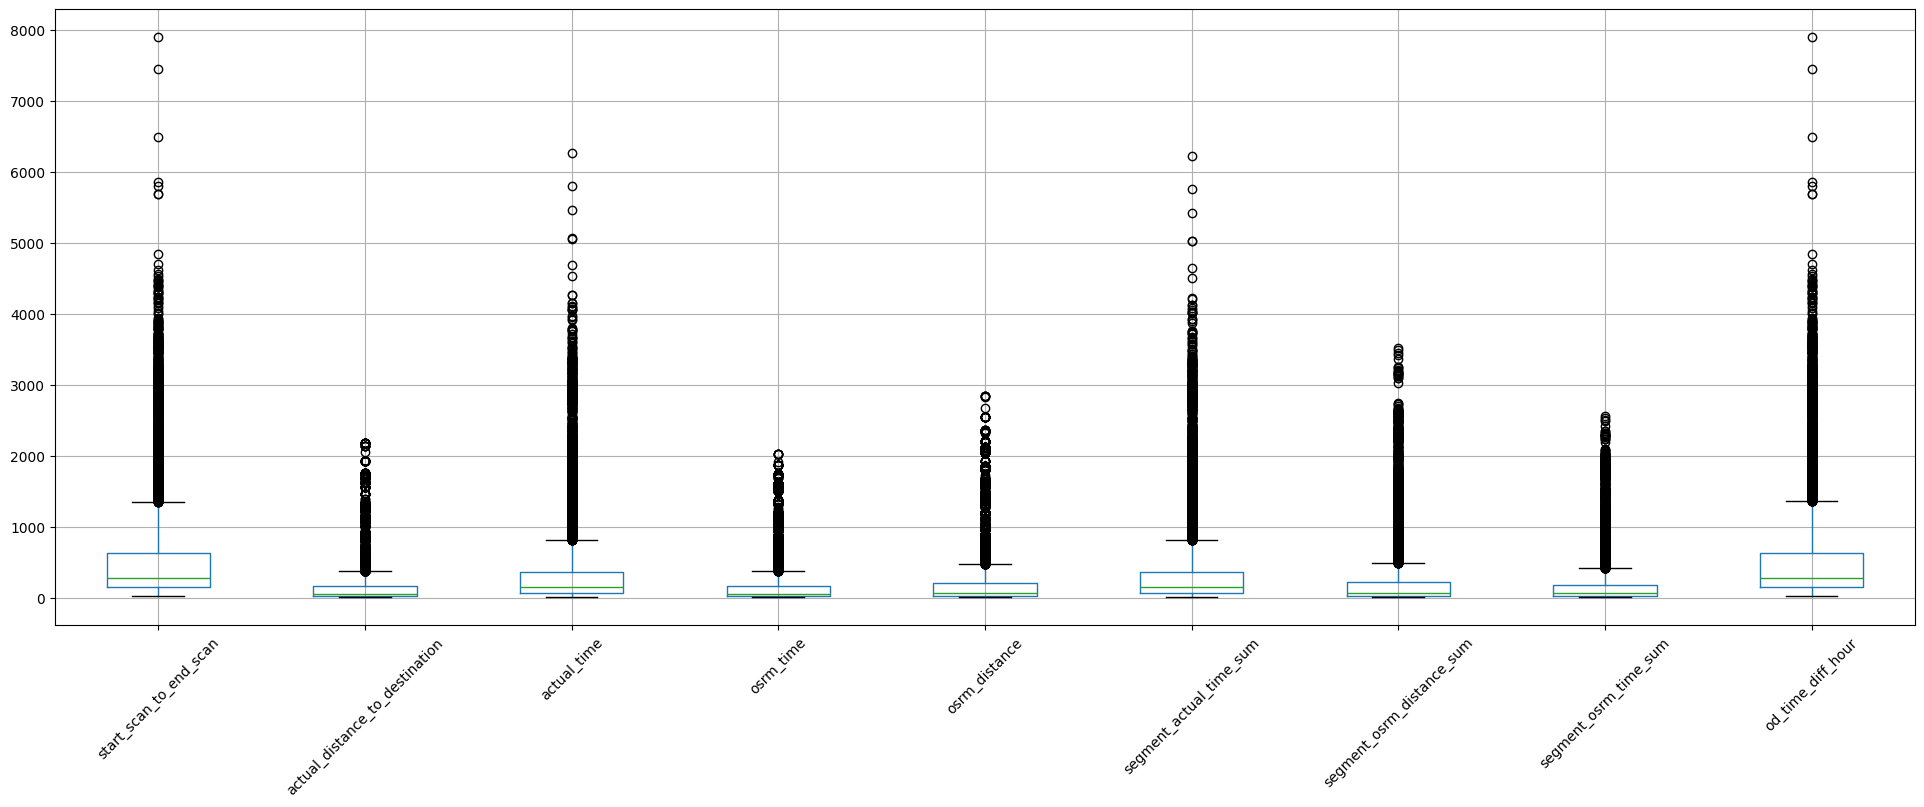

In [22]:
df_trip[num_cols].boxplot(rot=45,figsize=(24,8))

In [23]:
Q1 = df_trip[num_cols].quantile(0.25)
Q3 = df_trip[num_cols].quantile(0.75)

IQR = Q3 - Q1
# print(IQR)

In [24]:
outlier=df_trip[((df_trip[num_cols] < (Q1 - 1.5 * IQR)) | (df_trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outlier=outlier.reset_index()
# outlier

<Axes: >

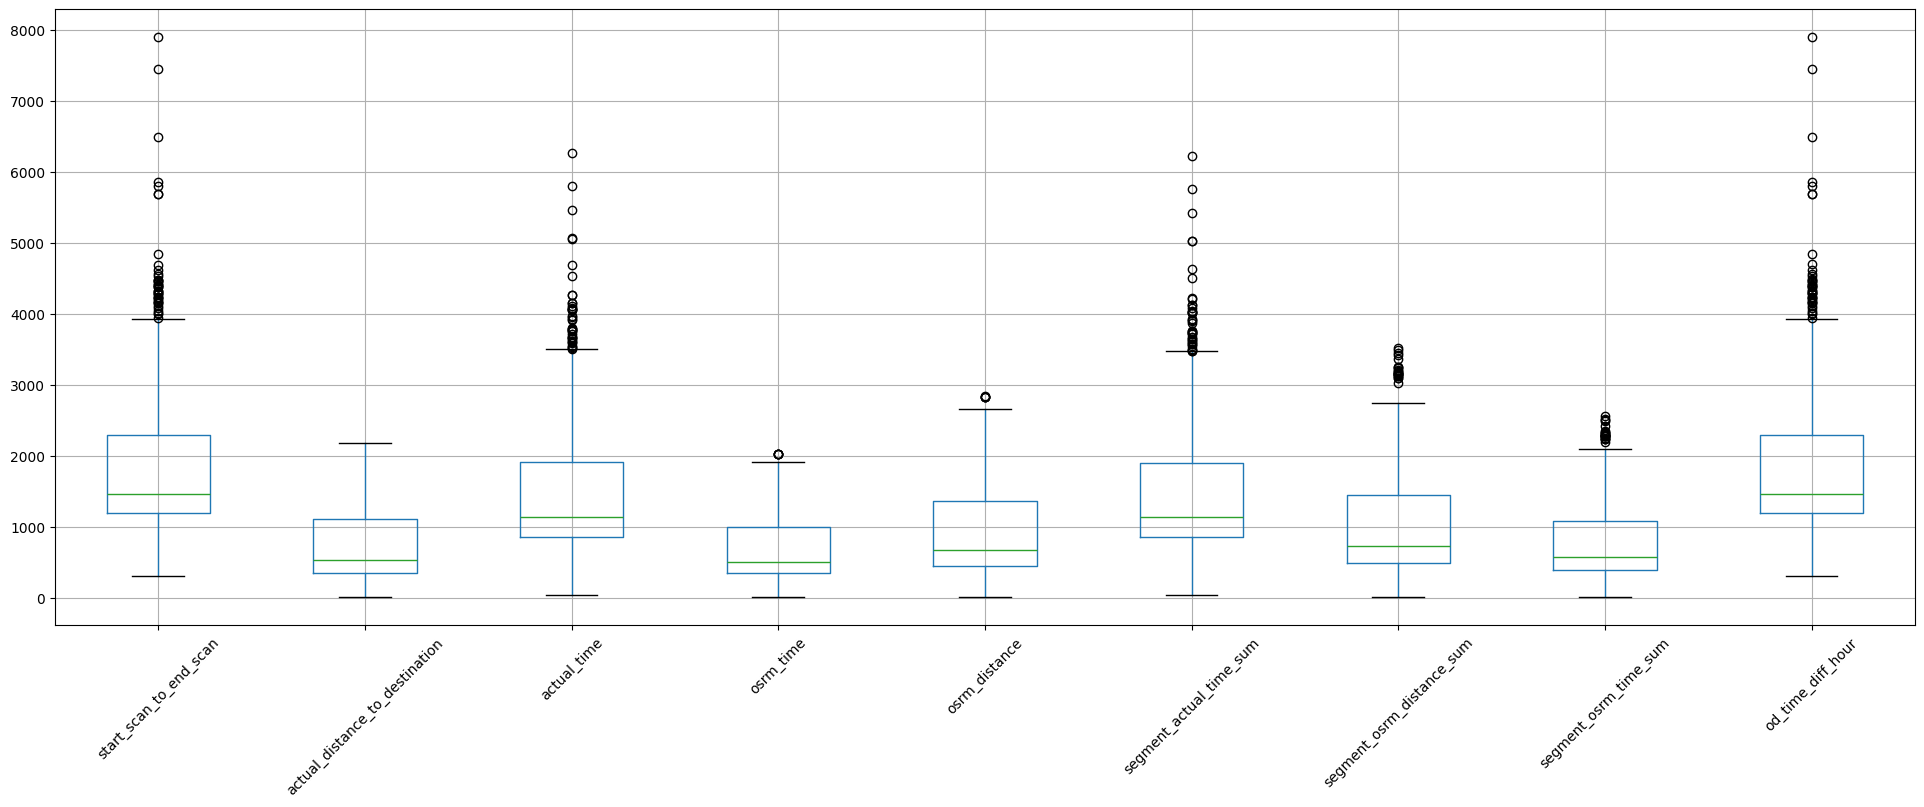

In [25]:
outlier[num_cols].boxplot(rot=45,figsize=(24,8))

In [26]:
outlier=df_trip
df_trip['route_type'].value_counts()

,count
route_type,
Carting,8906
FTL,5881


In [27]:
df_trip['route_type'] = df_trip['route_type'].map({'FTL':0, 'Carting':1})
# df_trip.head(7)

In [28]:
df_trip['data'].value_counts()

,count
data,
training,10645
test,4142


In [29]:
df_trip['data'] = df_trip['data'].map({'training':0, 'test':1})
# df_trip.head(7)

In [30]:
df_trip.iloc[111:117].reset_index(drop=True)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,Source_City,Source_Place,Source_Code_State,Destination_City,Destination_Place,Destination_Code_State,trip_year,trip_month,trip_day
0,0,2018-09-12 02:39:48.650640,thanos::sroute:cdf7bbbb-8fb5-4bd5-96d9-162fcf3...,0,trip-153671998865037832,IND502110AAA,Medak_Dwaraka_D (Telangana),IND503122AAA,Yellareddy_JKRoad_D (Telangana),671.0,673.222172,241.538175,442.0,249.0,306.5301,439.0,312.0253,248.0,Medak,Dwaraka,D (Telangana),Narsapur,Xroad,D (Telangana),2018,9,12
1,0,2018-09-12 02:40:03.098133,thanos::sroute:2994b7ae-bb9c-4d7c-a30f-7882553...,0,trip-153672000309775410,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),2390.0,2391.562406,1097.574144,2039.0,953.0,1290.4456,2021.0,1326.5902,1056.0,Bhiwandi,Mankoli,HB (Maharashtra),Bangalore,Nelmngla,H (Karnataka),2018,9,12
2,0,2018-09-12 02:42:04.457658,thanos::sroute:2d2cdf5e-6ea1-4525-833e-cae6a1a...,1,trip-153672012445728568,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND110064AAA,Delhi_Mayapuri_PC (Delhi),225.0,225.834859,45.959438,140.0,57.0,54.9214,138.0,64.5048,66.0,Gurgaon,Bilaspur,HB (Haryana),Delhi,Mayapuri,PC (Delhi),2018,9,12
3,0,2018-09-12 02:43:11.452505,thanos::sroute:39928fa7-4ce7-4b78-8e00-c56e31d...,1,trip-153672019145222964,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560048AAB,Bengaluru_Hoodi_IP (Karnataka),194.0,194.917011,29.584603,106.0,40.0,35.5419,105.0,39.3452,47.0,Bangalore,Nelmngla,H (Karnataka),Bengaluru,Hoodi,IP (Karnataka),2018,9,12
4,0,2018-09-12 02:43:42.671870,thanos::sroute:870bead8-6c8a-458f-b4d8-658de44...,0,trip-153672022267158924,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND834002AAB,Ranchi_Hub (Jharkhand),1749.0,1749.258237,1010.211830,1572.0,850.0,1192.0280,1552.0,1495.7506,1077.0,Gurgaon,Bilaspur,HB (Haryana),Ranchi,Hub (Jharkhand),None,2018,9,12
5,0,2018-09-12 02:44:26.827841,thanos::sroute:5bd33197-898a-47eb-bcde-7193b9f...,0,trip-153672026682746785,IND363310AAB,Dhrangadhra_NvygRDPP_D (Gujarat),IND363330AAB,Halvad_CrossRD_D (Gujarat),563.0,565.180069,253.270987,453.0,315.0,296.1639,447.0,312.7678,330.0,Dhrangadhra,NvygRDPP,D (Gujarat),Ahmedabad,East,H_1 (Gujarat),2018,9,12


##Hypothesis testing



###1. Actual Time vs. OSRM Predicted Time

In [31]:
from scipy.stats import ttest_rel

# Perform one-tailed paired t-test
t_stat, p_value = ttest_rel(df_trip['actual_time'], df_trip['osrm_time'], alternative='greater')

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 76.37699387098537
p-value: 0.0


There is a statistically significant difference between actual_time and osrm_time, with actual_time being greater.

The results suggest that the actual time taken for trips is consistently greater than the time estimated by the OSRM (Open Source Routing Machine).

###2. Actual Time vs. Segment-wise Actual Time

In [32]:
t_stat, p_value = ttest_rel(df_trip['actual_time'], df_trip['segment_actual_time_sum'])
print(f"Actual vs. Segment Actual Time: t-stat={t_stat}, p-value={p_value}")


Actual vs. Segment Actual Time: t-stat=68.26327799172758, p-value=0.0


In [33]:
from scipy.stats import ttest_rel

# Perform one-tailed paired t-test
t_stat, p_value = ttest_rel(df_trip['actual_time'], df_trip['segment_actual_time_sum'], alternative='greater')

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 68.26327799172758
p-value: 0.0


There is a statistically significant difference between the actual_time and the segment_actual_time_sum, with actual_time being greater.

The results suggest that the overall actual_time for trips is significantly longer than the sum of individual segment times


##3. OSRM Distance vs. Segment-wise OSRM Distance

In [34]:
t_stat, p_value = ttest_rel(df_trip['osrm_distance'], df_trip['segment_osrm_distance_sum'])
print(f"OSRM Distance vs. Segment OSRM Distance: t-stat={t_stat}, p-value={p_value}")


OSRM Distance vs. Segment OSRM Distance: t-stat=-37.24135017557747, p-value=3.046090802811484e-290


In [35]:
from scipy.stats import ttest_rel

# Perform one-tailed paired t-test
t_stat, p_value = ttest_rel(df_trip['osrm_distance'], df_trip['segment_osrm_distance_sum'], alternative='less')

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -37.24135017557747
p-value: 1.523045401405742e-290


The extremely low p-value suggests that the observed difference is highly unlikely to have occurred due to random chance.

The results suggest that the overall distance calculated by OSRM (osrm_distance) is significantly less than the sum of the individual segment distances.

### 4. OSRM Time vs. Segment-wise OSRM Time

In [36]:
t_stat, p_value = ttest_rel(df_trip['osrm_time'], df_trip['segment_osrm_time_sum'])
print(f"OSRM Time vs. Segment Actual Time: t-stat={t_stat}, p-value={p_value}")


OSRM Time vs. Segment Actual Time: t-stat=-43.20294257463631, p-value=0.0


In [37]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(df_trip['osrm_time'], df_trip['segment_osrm_time_sum'], alternative='less')
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -43.20294257463631, p-value: 0.0


The extremely low p-value allows us to reject the null hypothesis. This means the osrm_time is significantly less than the segment_osrm_time_sum.

The results suggest that the overall time calculated by OSRM (osrm_time) is significantly less than the sum of the individual segment times


## Distribution of Deliveries

<Figure size 1200x500 with 0 Axes>

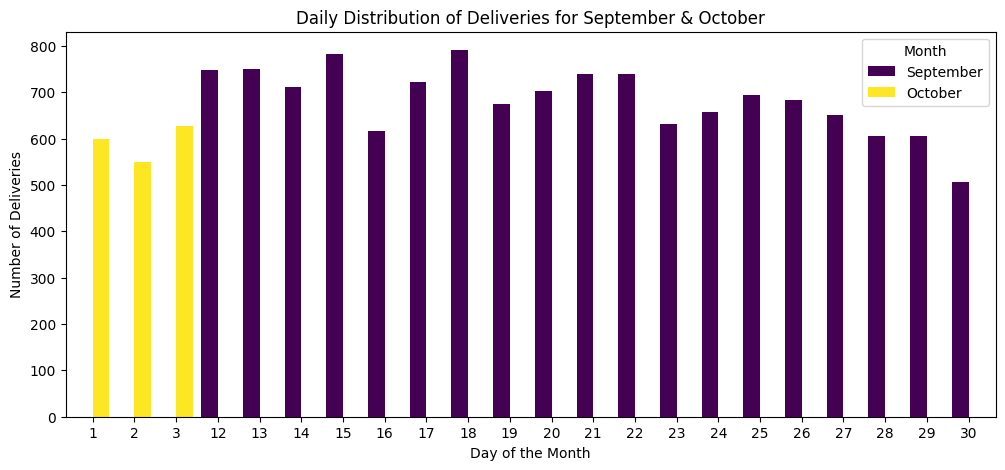

In [38]:
# Filter dataset for September and October
df_sep_oct = df_trip[df_trip['trip_month'].isin([9, 10])]

# Count trips per day for each month
daywise_deliveries = df_sep_oct.groupby(['trip_month', 'trip_day'])['trip_uuid'].count().unstack(0)

# Plot the distribution
plt.figure(figsize=(12, 5))
daywise_deliveries.plot(kind='bar', figsize=(12, 5), colormap="viridis", width=0.8)

# Labels and title
plt.xlabel("Day of the Month")
plt.ylabel("Number of Deliveries")
plt.title("Daily Distribution of Deliveries for September & October")
plt.legend(["September", "October"], title="Month")
plt.xticks(rotation=0)

# Show the plot
plt.show()


####1.Deliveries on the 18th day of September and October are significantly higher, suggesting peak demand around this date.
####2.The beginning and end of both months show lower delivery counts, indicating potential operational downtimes or reduced customer activity.

In [39]:
df_trip.head(7)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,Source_City,Source_Place,Source_Code_State,Destination_City,Destination_Place,Destination_Code_State,trip_year,trip_month,trip_day
0,0,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,0,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,Kanpur,Central,H_6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,9,12
1,0,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,9,12
2,0,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,0,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,9,12
3,0,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,Mumbai Hub (Maharashtra),None,None,Mumbai,MiraRd,IP (Maharashtra),2018,9,12
4,0,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,Bellary,Dc (Karnataka),D (Karnataka),Hospet (Karnataka),Dc (Karnataka),D (Karnataka),2018,9,12
5,0,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,190.487849,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,Chennai,Poonamallee (Tamil Nadu),DPC (Tamil Nadu),Chennai,Sriperumbudur,Dc (Tamil Nadu),2018,9,12
6,0,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,98.005634,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,Chennai,Chrompet,DPC (Tamil Nadu),Chennai,Vandalur,Dc (Tamil Nadu),2018,9,12


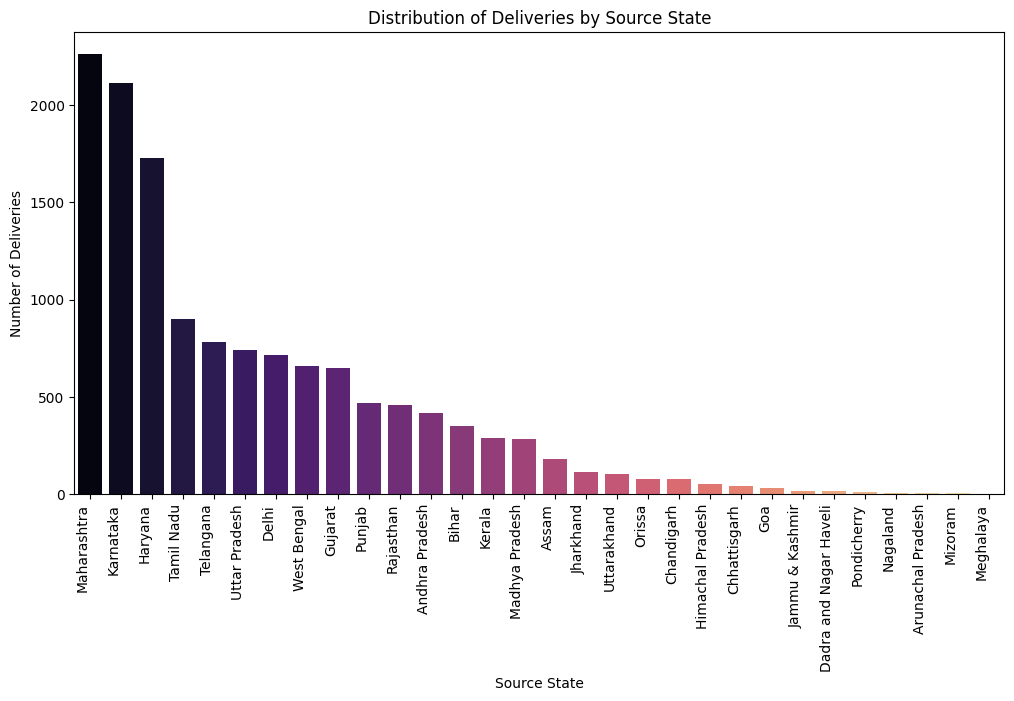

In [40]:
statewise_orders = df_trip['Source_Code_State'].dropna().apply(
    lambda x: x.split('(')[-1].split(')')[0] if '(' in x and ')' in x else x
)
statewise_orders = statewise_orders.value_counts().reset_index()
statewise_orders.columns = ['Source State', 'Total Orders']
statewise_orders

plt.figure(figsize=(12, 6))
sns.barplot(x=statewise_orders['Source State'], y=statewise_orders['Total Orders'], palette="magma")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right")

# Labels and title
plt.xlabel("Source State")
plt.ylabel("Number of Deliveries")
plt.title("Distribution of Deliveries by Source State")

# Show the plot
plt.show()

####1.Maharashtra: Stands out as the state with the highest number of deliveries, with approximately 1200 deliveries.

####2.The top states (Maharashtra, Karnataka, and Haryana) have significantly higher delivery counts compared to other states.

####3.States like Meghalaya, Arunachal Pradesh, and Nagaland have very few deliveries.

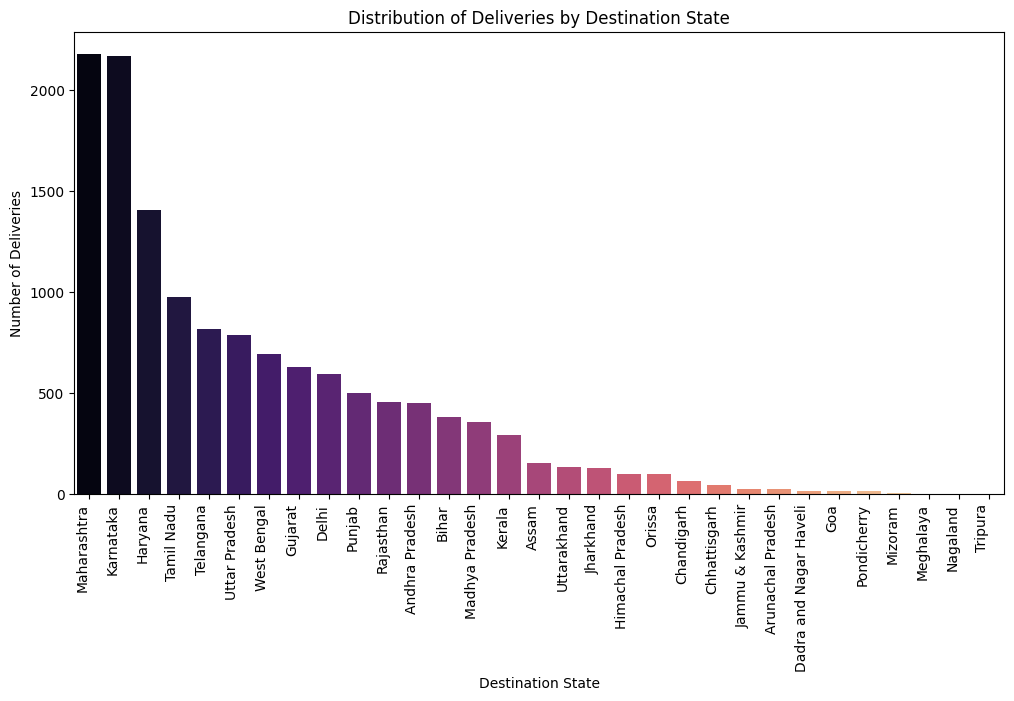

In [41]:
# Extract Destination State (text inside brackets, else keep original)
destinationwise_orders = df_trip['Destination_Code_State'].dropna().apply(
    lambda x: x.split('(')[-1].split(')')[0] if '(' in x and ')' in x else x
)

# Count orders per destination state
destinationwise_orders = destinationwise_orders.value_counts().reset_index()
destinationwise_orders.columns = ['Destination State', 'Total Orders']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=destinationwise_orders['Destination State'], y=destinationwise_orders['Total Orders'], palette="magma")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right")

# Labels and title
plt.xlabel("Destination State")
plt.ylabel("Number of Deliveries")
plt.title("Distribution of Deliveries by Destination State")

# Show the plot
plt.show()


1.Maharashtra stands out as the state with the highest number of deliveries, with approximately 1200 deliveries, indicating it is a key market for deliveries.

2.Several northeastern states, such as Meghalaya, Arunachal Pradesh, and Nagaland, have very low delivery counts


In [42]:
# Displaying the 'trip_creation_time' and 'actual_time' columns
df_trip[['trip_creation_time', 'actual_time']]


,trip_creation_time,actual_time
0,2018-09-12 00:00:16.535741,1562.0
1,2018-09-12 00:00:22.886430,143.0
2,2018-09-12 00:00:33.691250,3347.0
3,2018-09-12 00:01:00.113710,59.0
4,2018-09-12 00:02:09.740725,341.0
...,...,...
14782,2018-10-03 23:55:56.258533,83.0
14783,2018-10-03 23:57:23.863155,21.0
14784,2018-10-03 23:57:44.429324,282.0
14785,2018-10-03 23:59:14.390954,264.0


  time_category  trip_count
0         Night        6829
1       Evening        3208
2       Morning        2778
3     Afternoon        1972


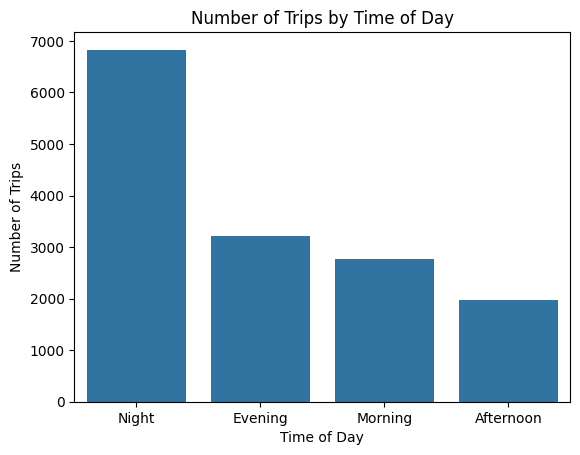

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_trip is your DataFrame

# Function to categorize times into bins
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Converting trip_creation_time to datetime if it's not already
df_trip['trip_creation_time'] = pd.to_datetime(df_trip['trip_creation_time'])

# Applying the function to create a new column for time categories
df_trip['time_category'] = df_trip['trip_creation_time'].dt.hour.apply(categorize_time)

# Counting the number of trips in each time category
count_df = df_trip['time_category'].value_counts().reset_index()
count_df.columns = ['time_category', 'trip_count']

# Displaying the count DataFrame
print(count_df)

# Creating a bar plot for the trip counts
sns.barplot(data=count_df, x='time_category', y='trip_count')
plt.title('Number of Trips by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.show()


1.The Night period stands out with the highest number of trips (3,556), indicating peak operational activity or higher travel demand during night hours.

2.The Afternoon period has the lowest number of trips (1,038), suggesting it is the least busy time for trip creation.

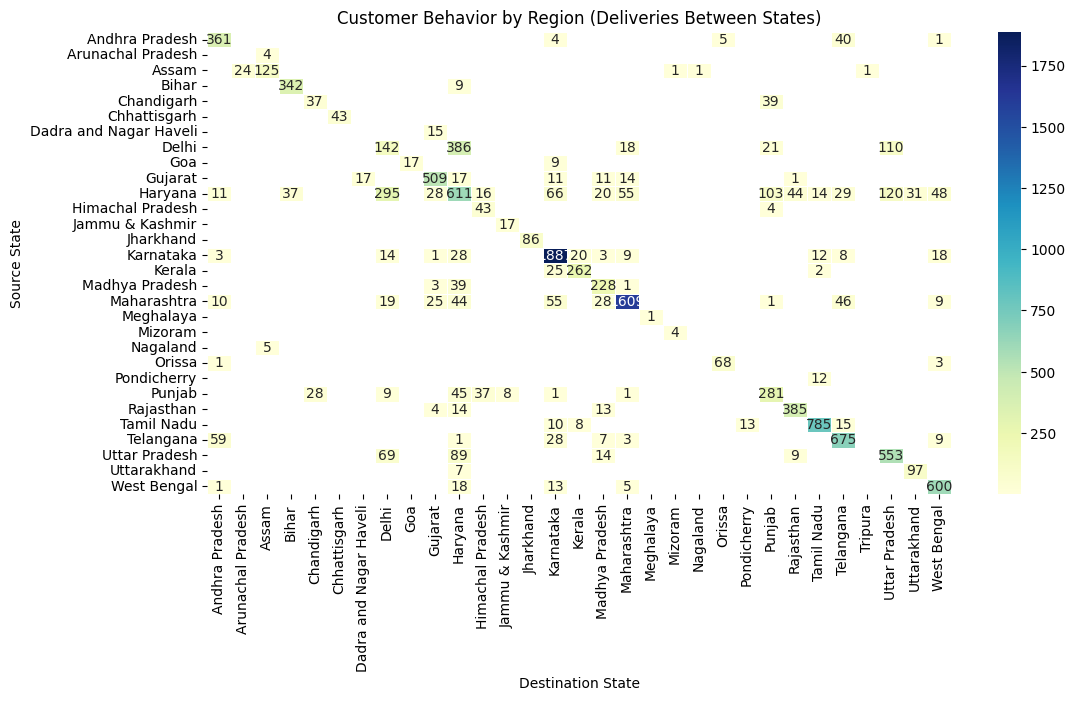

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_trip is your DataFrame

# Function to extract state codes
def extract_state_code(column):
    return column.dropna().apply(
        lambda x: x.split('(')[-1].split(')')[0] if '(' in x and ')' in x else x
    )

# Extracting state codes from Destination_Code_State and Source_Code_State
df_trip['Destination_Code_State'] = extract_state_code(df_trip['Destination_Code_State'])
df_trip['Source_Code_State'] = extract_state_code(df_trip['Source_Code_State'])

# Group by Source and Destination State to get delivery counts
region_deliveries = df_trip.groupby(['Source_Code_State', 'Destination_Code_State']).size().reset_index(name='Total Deliveries')

# Pivot table for heatmap (Source as index, Destination as columns)
heatmap_data = region_deliveries.pivot(index='Source_Code_State', columns='Destination_Code_State', values='Total Deliveries')

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")

# Labels and title
plt.xlabel("Destination State")
plt.ylabel("Source State")
plt.title("Customer Behavior by Region (Deliveries Between States)")

plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()


1.The heatmap provides a detailed visualization of delivery volumes between source and destination states.

2.The intensity of the colors indicates the volume of deliveries, with darker shades representing higher delivery counts.

3.**Maharashtra and Karnataka**: These states have multiple high-volume interactions with other states, highlighting them as major hubs for deliveries.

Average Delivery Time per Trip UUID:
                  trip_uuid  actual_time
0  trip-153671041653548748       1562.0
1  trip-153671042288605164        143.0
2  trip-153671043369099517       3347.0
3  trip-153671046011330457         59.0
4  trip-153671052974046625        341.0
5  trip-153671055416136166         61.0
6  trip-153671066201138152         24.0


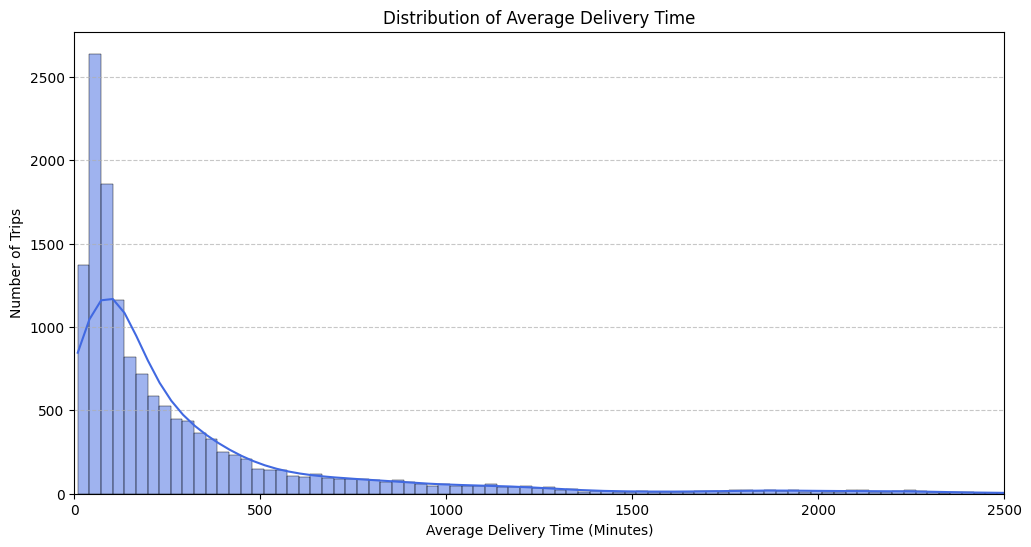

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Average Delivery Time per trip_uuid_id
avg_delivery_time_per_trip = df_trip.groupby('trip_uuid')['actual_time'].mean().reset_index()
print("Average Delivery Time per Trip UUID:\n", avg_delivery_time_per_trip.head(7))

# Plot histogram (countplot) of trip counts within time bins
plt.figure(figsize=(12, 6))
sns.histplot(avg_delivery_time_per_trip['actual_time'], bins=200, kde=True, color="royalblue")

# Set x-axis limit
plt.xlim(0, 2500)

# Labels and title
plt.title('Distribution of Average Delivery Time')
plt.xlabel('Average Delivery Time (Minutes)')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


1.The distribution appears to be right-skewed, with a concentration of trips having lower average delivery times and a long tail towards higher times.

2.The majority of trips have an average delivery time between 400 and 600 minutes, indicating this is a common range for delivery durations.

##Recommendations

###1.State-Level Analysis:

**Maharashtra**: The majority of orders originate from Maharashtra, making it a crucial state for deliveries.

**Karnataka and Haryana**: These states also show a high volume of order origins, indicating their importance in the delivery network.

###2.Staffing and Resources:
Ensure adequate staffing and resource allocation in high-demand states to handle peak delivery volumes efficiently.

###3.Longer Delivery Times:
Conduct a detailed analysis of trips with longer delivery times to identify and address bottlenecks or inefficiencies in the delivery process.